### Author: Dipmalya Chakraborty
## Task 3: Exploratory Data Analysis - Retail
Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. This task is about Exploratory Data Analysis - Retail where the task focuses on a business manager who will try to find out weak areas where he can work to make more profit.


In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset
df = pd.read_csv('SampleSuperstore.csv')  

#display top 5 rows
df.head()    

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#display bottom 5 rows
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
#size of dataset
df.shape

(9994, 13)

The dataset has 9994 rows and 13 columns.

In [6]:
#statistical summary of our dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#checking null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

None of the columns contain a null value.

In [8]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
#check for duplicate values
df.duplicated().sum()

17

In [10]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
df['Postal Code'] = df['Postal Code'].astype('object')

In [12]:
#dropping duplicates
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

In [13]:
#dropping postal code column
df = df.drop(['Postal Code'],axis = 1)    

## Bivariate Analysis

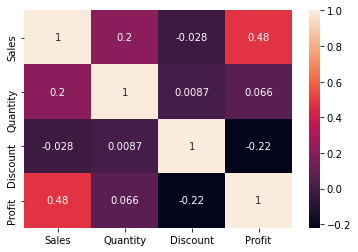

In [14]:
#correlation matrix
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

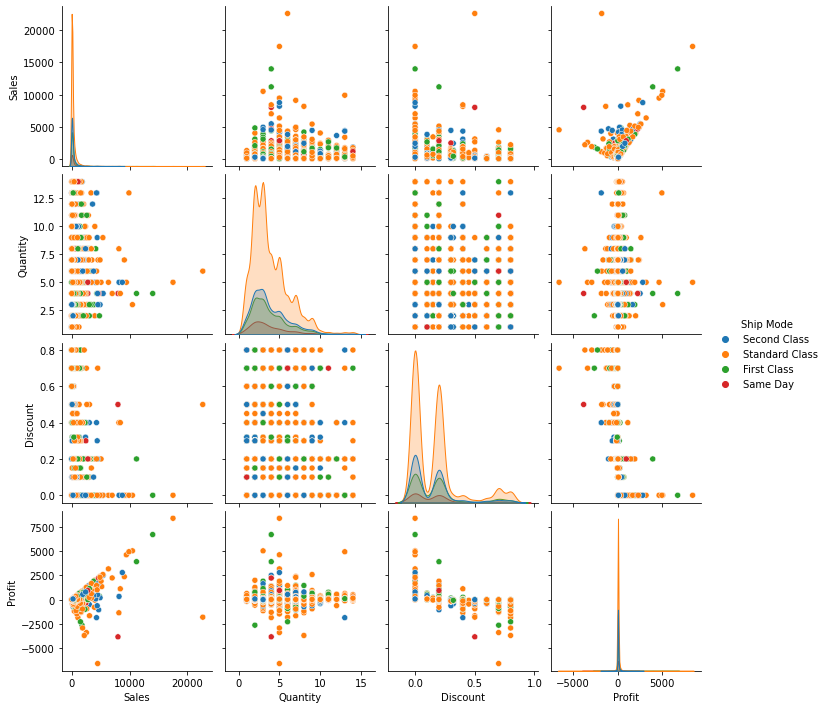

In [15]:
#visualizing pair plots
sns.pairplot(df, hue = 'Ship Mode')
plt.show()

In [16]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

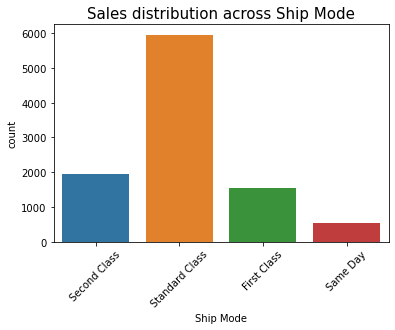

In [17]:
plt.title("Sales distribution across Ship Mode", fontsize=15)
sns.countplot(x=df['Ship Mode'])
plt.xticks(rotation=45)
plt.show()

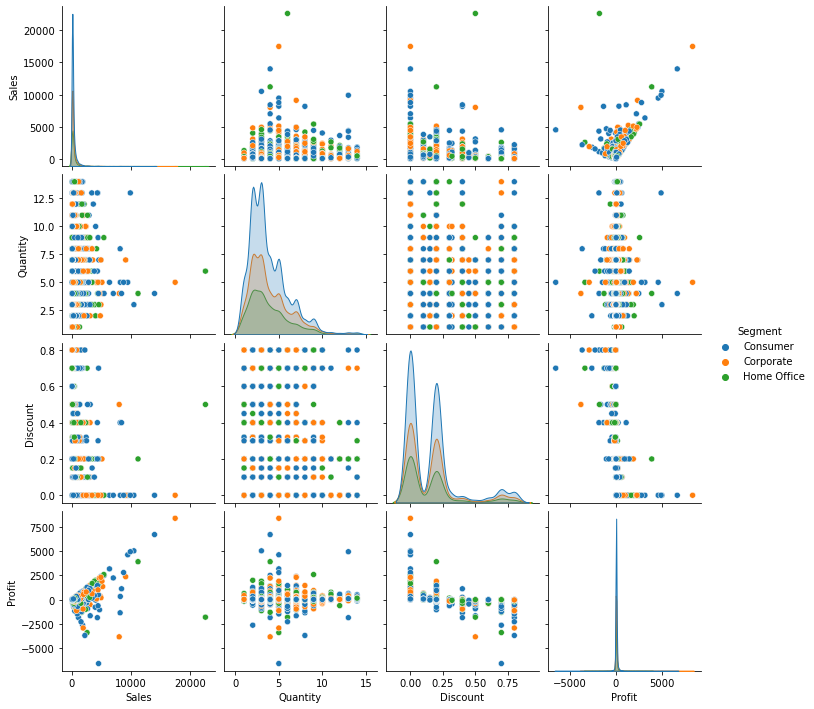

In [18]:
#visualizing pair plots
sns.pairplot(df,hue = 'Segment')     
plt.show()

In [19]:
df['Segment'].value_counts()        

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

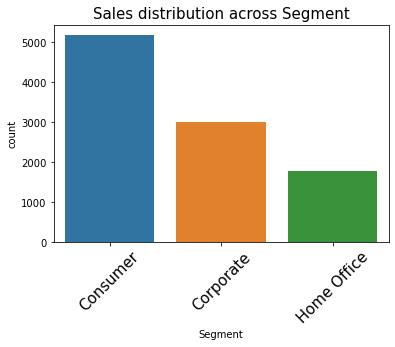

In [20]:
plt.title("Sales distribution across Segment", fontsize=15)
sns.countplot(x=df['Segment'])
plt.xticks(rotation=45, fontsize=15)
plt.show()

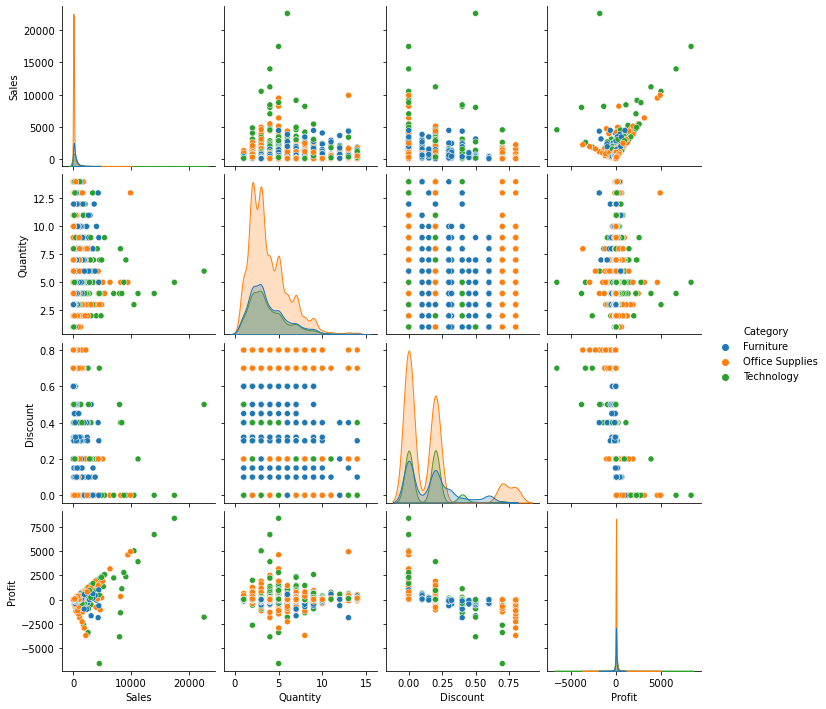

In [21]:
sns.pairplot(df,hue='Category')
plt.show()

## Sales distribution in Category

In [22]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

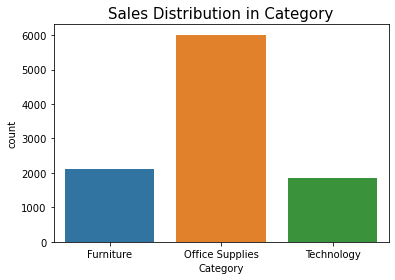

In [23]:
plt.title("Sales Distribution in Category", fontsize=15)
sns.countplot(x='Category',data=df)
plt.show()

### Observation:
Maximum sales in Office Supplies Category and miminum sales in Technology.

## Sales distribution in Sub-Category

In [24]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

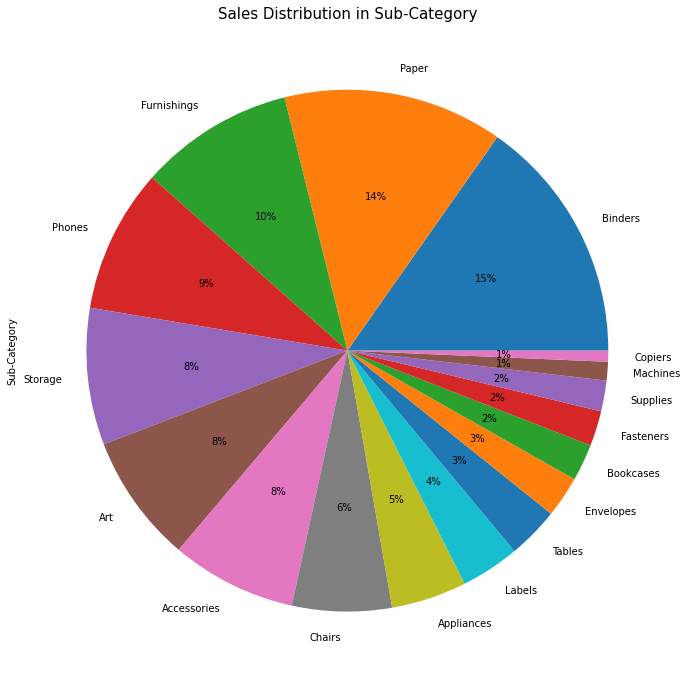

In [25]:
plt.figure(figsize=(15,12))
plt.title("Sales Distribution in Sub-Category", fontsize=15)
df['Sub-Category'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

### Observation:
Binders, Paper, furnishings, Phones, storage, art, accessories are having maximum sales.
Copiers, machines, suppliers are having minimum sales.

## Sales distribution in various States

In [26]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

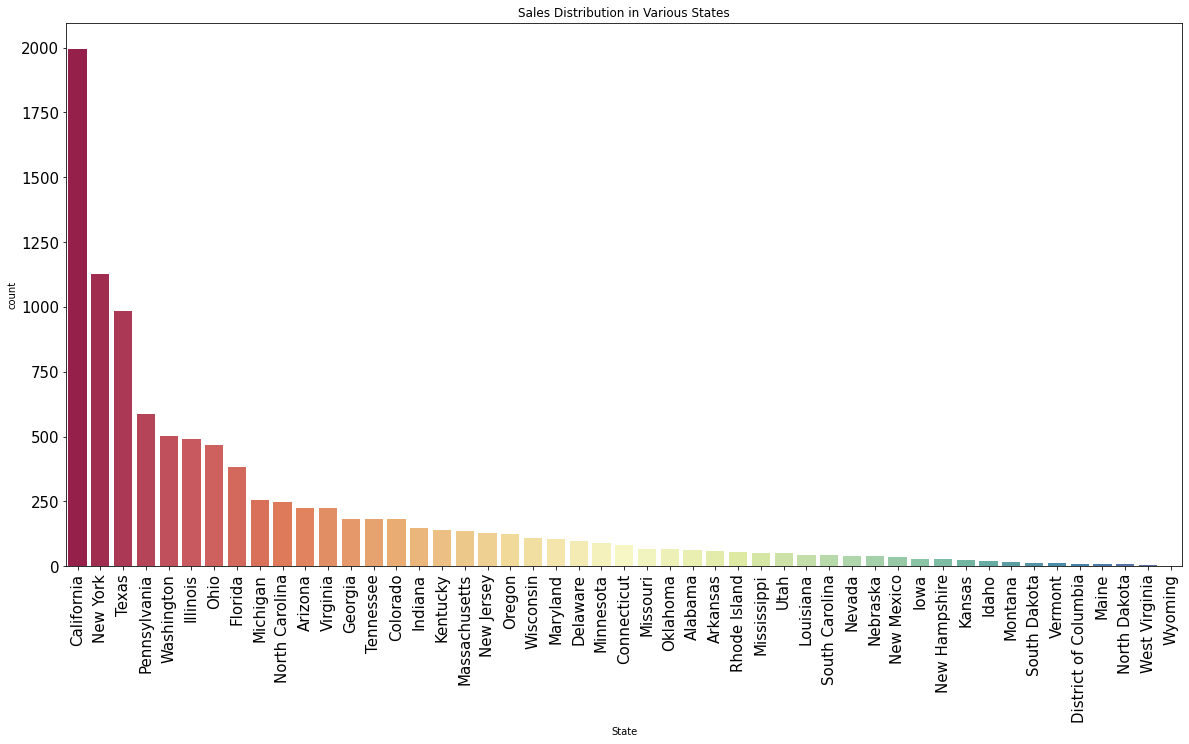

In [27]:
plt.figure(figsize=(20,10))
plt.title("Sales Distribution in Various States")
sns.countplot(x='State',data=df,order=df['State'].value_counts().index, palette='Spectral')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Observation:
Maximum buyers are from California and New York.

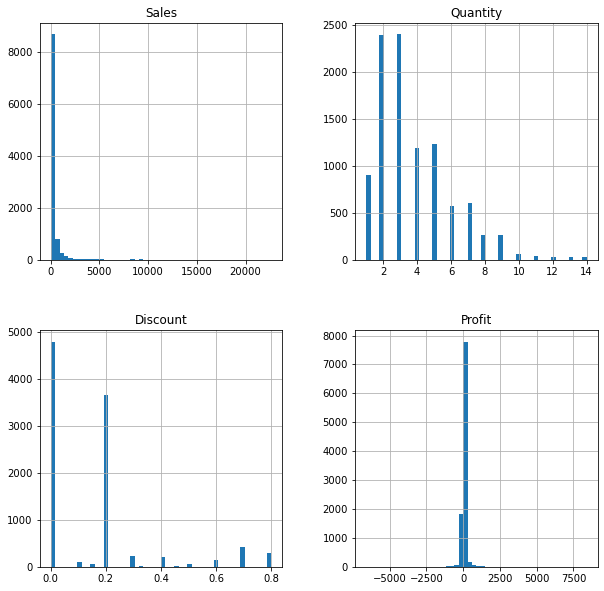

In [28]:
#check for discount and quantity
df.hist(figsize=(10,10),bins=50)
plt.show()

### Observation: 
Most customers tend to buy 2-3 quantities.
Discounts are given mostly in the range of 0 to 20 percent.

## Sales distribution by Region

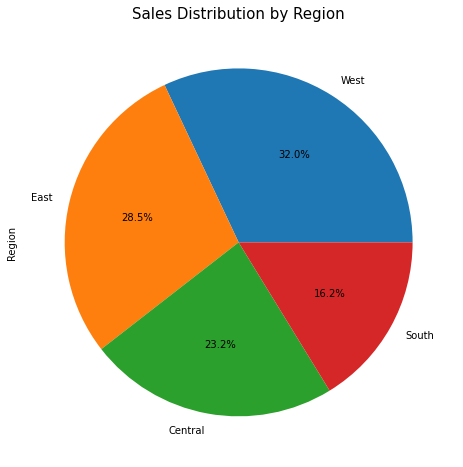

In [29]:
plt.figure(figsize=(10,8))
plt.title("Sales Distribution by Region", fontsize=15)
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

### Observation: 
Sales are more in the East and West region as compared to Central and South.

## Profit vs Discount

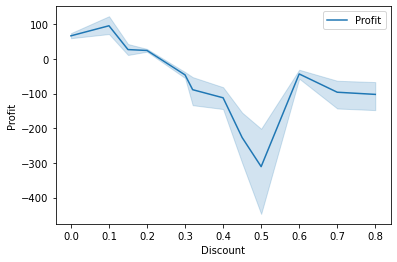

In [30]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

### Observation:
We can clearly observe that the discount has a negative relation with Profit i.e. as the profit is increasing the Profit generated is decreased.

## Profit vs Quantity

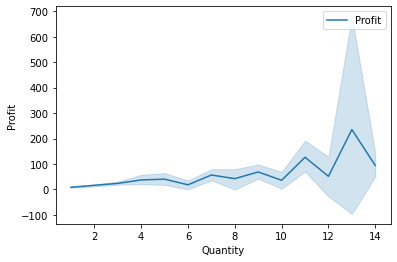

In [31]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

### Observation:
We can clearly observe that the discount has a positive relation with Profit i.e. as the profit is increasing the Profit generated is increased.

## Profit vs Sales

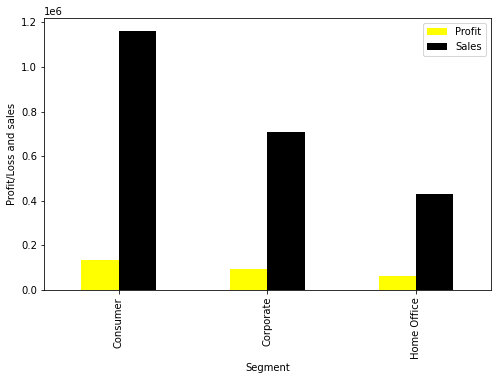

In [32]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['yellow','black'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### Observation:
Profit and sales are maximum in consumer segment and minimum in Home Office segment.

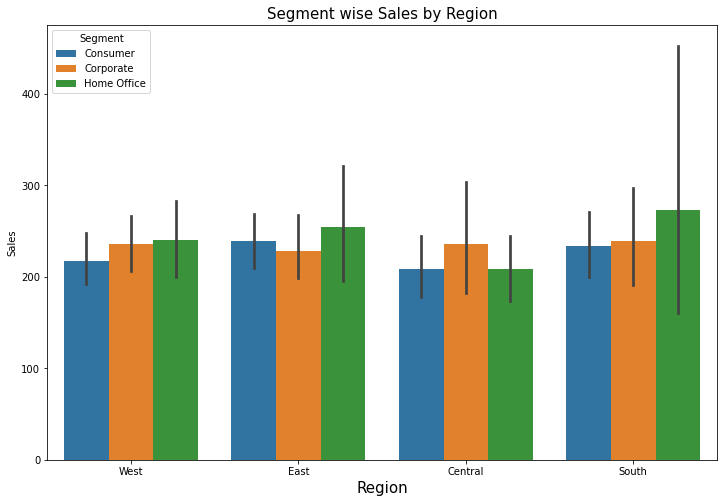

In [33]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales by Region', fontsize=15)
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index)
plt.xlabel('Region',fontsize=15)
plt.show()

### Observation:
There is no such variation in segment-wise sales by region.

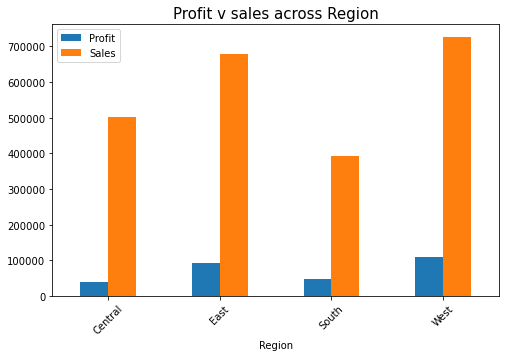

In [34]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(figsize=(8,5))
plt.title('Profit v sales across Region', fontsize=15)
plt.xticks(rotation=45)
plt.show()

### Observation:
Profit and sales are maximum in the West region and minimum in South region.

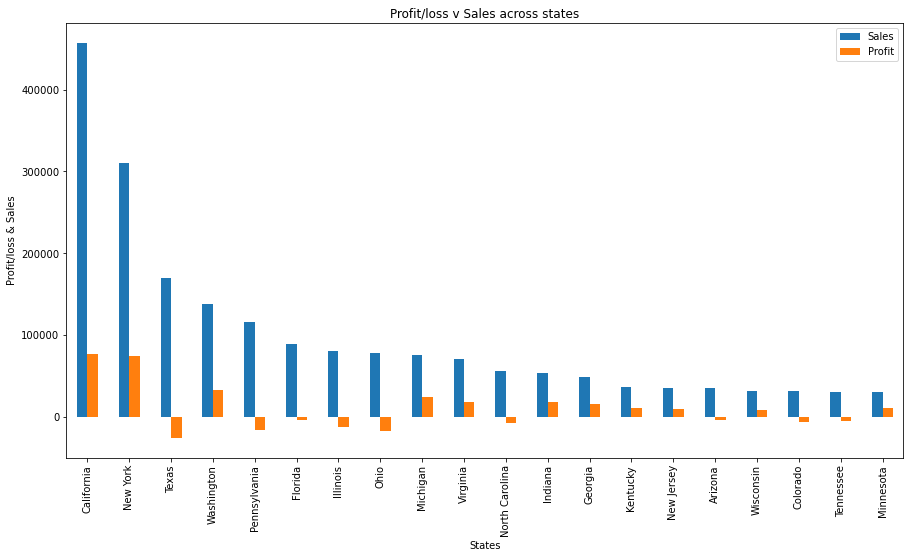

In [35]:
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:20].plot.bar(figsize=(15,8))
plt.title('Profit/loss v Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

### Observation:
High profit in California, New York.
Loss in Texas, Pennsylvania, Ohio.

In [36]:
t_states = df['State'].value_counts().nlargest(10)
t_states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

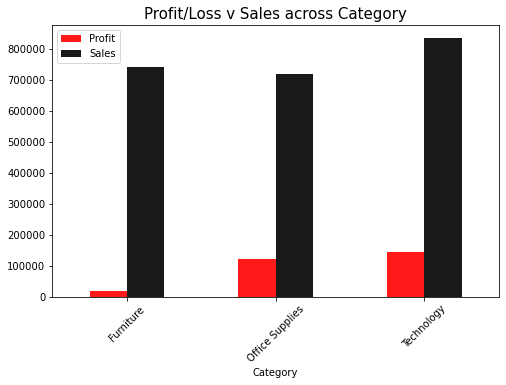

In [37]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['red','black'],alpha=0.9,figsize=(8,5))
plt.title('Profit/Loss v Sales across Category', fontsize=15)
plt.xticks(rotation=45)
plt.show()

### Observation:
Technology and Office Supplies have high profit as compared to Furniture.

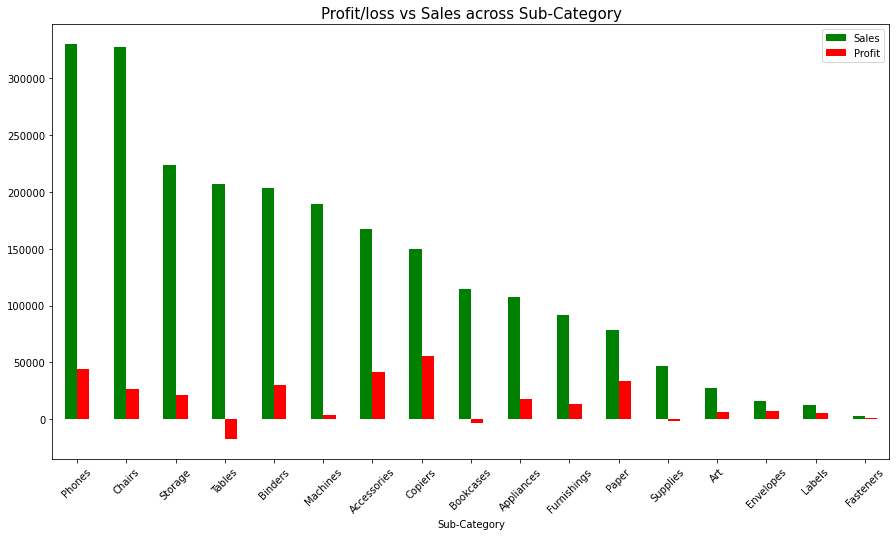

In [38]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps.plot.bar(color=['green','red'],figsize=(15,8))
plt.title('Profit/loss vs Sales across Sub-Category', fontsize=15)
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.show()

### Observation 
Phones sub-category have high sales.
Chairs have high sales but less profit compared to phones.
Tables and Bookmarks sub-categories are facing huge loss.

### Insights Drawn from Analysing the SampleSuperstore data:
1. The profit generated by Office supplies category is more, but the sales for office supplies are less. So, we have to work on increasing the sales for Office Supplies Category.
2. The profits for Tables and Bookcases sub-category are very less but the profit for Copiers is very high. So, we should focus on increasing the sales of the copiers.
3. The company is facing Loss in 5 states with high sales.
4. The states with high Sales are generating less profit due to high discount allowance.
5. Discount is negatively related to the Profit. This is be noted when a discount is being allowed on the products.